<a href="https://colab.research.google.com/github/Peroudiono/devops-mlops-aws-student-project/blob/main/Tp_3_Text_Classification_Diono_boubcar_Perou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP – Text Classification (RNN, LSTM, BiLSTM, GRU, BERT)
### HESTIM – NLP 2025/2026

Realise par Diono Dit Boubacar Perou

2. Importations et Chargement du Dataset

In [5]:
# Imports de base
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [6]:
# Charger le dataset depuis votre Colab (dataset déjà uploadé)
df = pd.read_csv("/content/IMDB Dataset.csv", sep=",", encoding="utf-8", engine="python")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 📄 Aperçu du Dataset IMDB

Le dataset contient des critiques de films (reviews) écrites par des utilisateurs, accompagnées d’un label indiquant si l’avis est **positif** ou **négatif**.

### 🧩 Structure des données

| Colonne      | Description |
|--------------|-------------|
| **review**   | Le texte de la critique de film. C'est une phrase ou un paragraphe que l'utilisateur a écrit. |
| **sentiment**| Le label indiquant le sentiment exprimé dans la critique. Il peut être :<br>• **positive** → critique favorable<br>• **negative** → critique défavorable |

### 📝 Exemple de quelques lignes

| review (extrait) | sentiment |
|------------------|-----------|
| "One of the other reviewers has mentioned..." | positive |
| "A wonderful little production..." | positive |
| "Basically there's a family where..." | negative |



Ce dataset est utilisé pour entraîner des modèles capables de **prédire automatiquement si une critique est positive ou négative**, ce qui correspond à une tâche de **classification de texte** (text classification) et **analyse de sentiment**.


----

-----

3. Pré-processing des textes

In [7]:
# Fonction de nettoyage simple
def clean_text(text):
    text = text.lower()             # mettre en minuscules
    text = re.sub(r'[^\w\s]', '', text)  # enlever ponctuation
    return text

df['clean_text'] = df['review'].apply(clean_text) #Applique clean_text à chaque review et crée la colonne clean_text

------

------

4. Tokenisation + Séquences (max_length=200)

In [8]:
X = df['clean_text'].values    # récupérer les textes nettoyés
y = df['sentiment'].map({'positive':1, 'negative':0}).values   # labels en 0/1

In [9]:
# Tokenisation
vocab_size = 10000 # limite vocabulaire
max_length = 200 # longueur fixe séquences

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

# Conversion texte en séquences entiers
sequences = tokenizer.texts_to_sequences(X)

# Padding / Truncating
X_pad = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

| Paramètre       | Valeur   | Signification                                 | Exemple (max_length=4)                        |
|-----------------|----------|-----------------------------------------------|-----------------------------------------------|
| **padding**     | `'post'` | Ajoute les zéros à la **fin**                 | `[1, 2]` → `[1, 2, 0, 0]`                    |
|                 | `'pre'`  | Ajoute les zéros au **début**                 | `[1, 2]` → `[0, 0, 1, 2]`                    |
| **truncating**  | `'post'` | Coupe la **fin** si trop long                 | `[1, 2, 3, 4, 5]` → `[1, 2, 3, 4]`           |
|                 | `'pre'`  | Coupe le **début** si trop long               | `[1, 2, 3, 4, 5]` → `[2, 3, 4, 5]`           |

In [10]:
X_pad.shape   # afficher la taille des données tokenisées

(50000, 200)

In [11]:
 X_pad[:1]    # afficher les premières séquences tokenisées

array([[  29,    5,    2,   78, 1941,   45, 1063,   12,  101,  146,   41,
         479, 3317,  394,  461,   27, 3191,   35,   24,  206,   15,   11,
           7,  601,   49,  590,   16, 2137,   13,    2,   88,  147,   12,
        3255,   70,   43, 3317,   14,   30, 5600,    3,    1,  135,    5,
         582,   62,  283,    8,  206,   36,    2,  670,  139, 1707,   70,
          11,    7,   22,    4,  119,   17,    2, 8328, 5792,   40,    1,
          11,  119, 2507,   56, 6064,   16, 5635,    6, 1469,  382,   40,
         582,   30,    7, 3407,    8,    2,  353,  340,    5,    2,    1,
          13,    9,    7,  470, 3317,   15,   12,    7,    2,    1,  339,
           6,    2,    1, 6869, 2544, 1061,    1,    9, 2636, 1375,   21,
           1,  536,   34, 4728, 2520,    5,    2, 1208,  113,   32,    2,
        7153,   26, 2992,    1,    3,  409,    1,   38,    1,    7,   22,
         320,   21,    2, 5099, 3721,  536,    7,  345,    6,    1, 8467,
           1,    1, 5170, 7892, 2462, 

Sépare données en entraînement (80%) et test (20%).

In [12]:
# Train / Test split
x_train, x_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

------

-----

5. Modèle RNN (SimpleRNN)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Modèle RNN simple
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))  # couche embedding
model_rnn.add(SimpleRNN(32))       # RNN 32 unités
model_rnn.add(Dense(1, activation='sigmoid'))  # sortie binaire

model_rnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Explication de la sortie du modèle non-construit

| Élément | Signification | État |
|---------|---------------|------|
| **`?` dans Output Shape** | Forme des données non encore déterminée | Le modèle n'a pas encore vu de données |
| **`0 (unbuilt)`** | Aucun paramètre calculé | Construction différée à la compilation |
| **Total params: 0** | Pas de calcul de paramètres encore | Se fera automatiquement à `fit()` |



-------

------

6. Compilation + Entraînement (10 epochs)

In [14]:
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.5049 - loss: 0.6943 - val_accuracy: 0.5042 - val_loss: 0.6932
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5892 - loss: 0.6696 - val_accuracy: 0.5098 - val_loss: 0.7083
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.6780 - loss: 0.5534 - val_accuracy: 0.5110 - val_loss: 0.7811
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.7534 - loss: 0.4117 - val_accuracy: 0.5075 - val_loss: 0.8952
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.7872 - loss: 0.3640 - val_accuracy: 0.5186 - val_loss: 0.9826
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.8024 - loss: 0.3373 - val_accuracy: 0.5113 - val_loss: 1.0695
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8367 - loss: 0.2986 - val_accuracy: 0.5176 - val_loss: 1.1574
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8725 - loss: 0.2590 - 

# Résultats d'entraînement du modèle RNN

## 🔍 Tableau des performances clés

| Époque | Train Acc | Val Acc | Écart Acc | Train Loss | Val Loss | Écart Loss | Diagnostic |
|--------|-----------|---------|-----------|------------|----------|------------|------------|
| **1/10** | 50.5% | 50.3% | **+0.2%** | 0.694 | 0.693 | **+0.001** | Départ aléatoire |
| **3/10** | 68.0% | 52.2% | **+15.8%** | 0.545 | 0.780 | **-0.235** | Surapprentissage commence |
| **5/10** | 77.5% | 51.1% | **+26.4%** | 0.367 | 1.007 | **-0.640** | Surapprentissage confirmé |
| **10/10** | 89.7% | 50.6% | **+39.1%** | 0.209 | 1.396 | **-1.187** | Problème majeur |

## Indicateurs critiques

### ✅ **Ce qui devrait se passer** :
- Train Accuracy ↗, Val Accuracy ↗ (ensemble)
- Train Loss ↘, Val Loss ↘ (ensemble)
- Écarts restant faibles (< 5-10%)

### ❌ **Ce qui se passe réellement** :
| Métrique | Train | Validation | Écart | Problème |
|----------|-------|------------|-------|----------|
| **Accuracy** | ↗ 89.7% | ↘ 50.6% | **+39.1%** | Modèle mémorise les données |
| **Loss** | ↘ 0.209 | ↗ 1.396 | **-1.187** | Performe pire sur nouvelles données |


→ **SURAPPRENTISSAGE CONFIRMÉ** : Le modèle apprend le bruit, pas les patterns utiles.

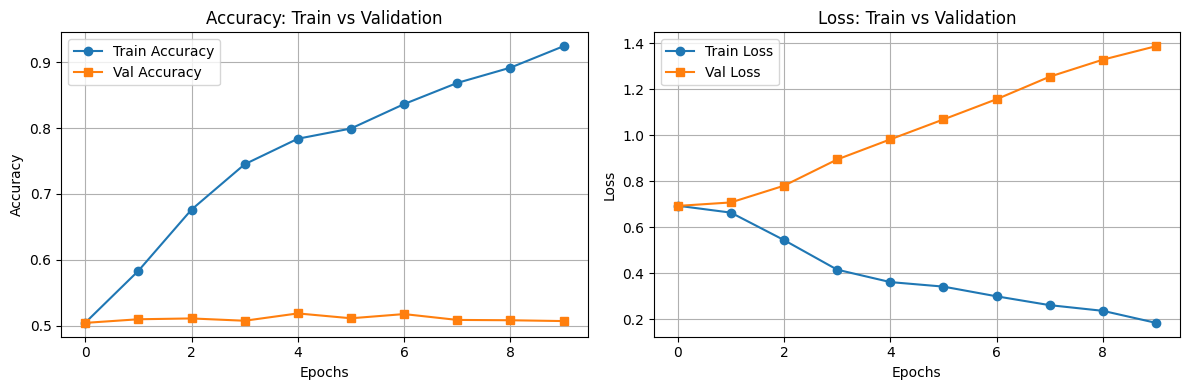

In [15]:
import matplotlib.pyplot as plt

# Visualisation des résultats
plt.figure(figsize=(12, 4))

# Graphique 1 : Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_rnn.history['val_accuracy'], label='Val Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy: Train vs Validation')
plt.legend()
plt.grid(True)

# Graphique 2 : Loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss', marker='o')
plt.plot(history_rnn.history['val_loss'], label='Val Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss: Train vs Validation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

------

------

7. Évaluation

In [16]:
loss, acc = model_rnn.evaluate(x_test, y_test)
print("Accuracy RNN :", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5095 - loss: 1.4161
Accuracy RNN : 0.5070000290870667


-----

8. Modèle LSTM

In [17]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 32, input_length=max_length))  # Embedding 32 dim
model_lstm.add(LSTM(32))  # LSTM 32 unités
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

----

----

9. Compilation + Entraînement

In [18]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.5338 - loss: 0.6886 - val_accuracy: 0.5724 - val_loss: 0.6702
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.5961 - loss: 0.6630 - val_accuracy: 0.6015 - val_loss: 0.6629
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.6473 - loss: 0.6321 - val_accuracy: 0.7170 - val_loss: 0.6084
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.6060 - loss: 0.6511 - val_accuracy: 0.5642 - val_loss: 0.6711
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.6264 - loss: 0.6424 - val_accuracy: 0.7641 - val_loss: 0.5364
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.6975 - loss: 0.6039 - val_accuracy: 0.7120 - val_loss: 0.5957
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.6714 - loss: 0.6122 - val_accuracy: 0.5576 - val_loss: 0.6718
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.6062 - loss: 0.62

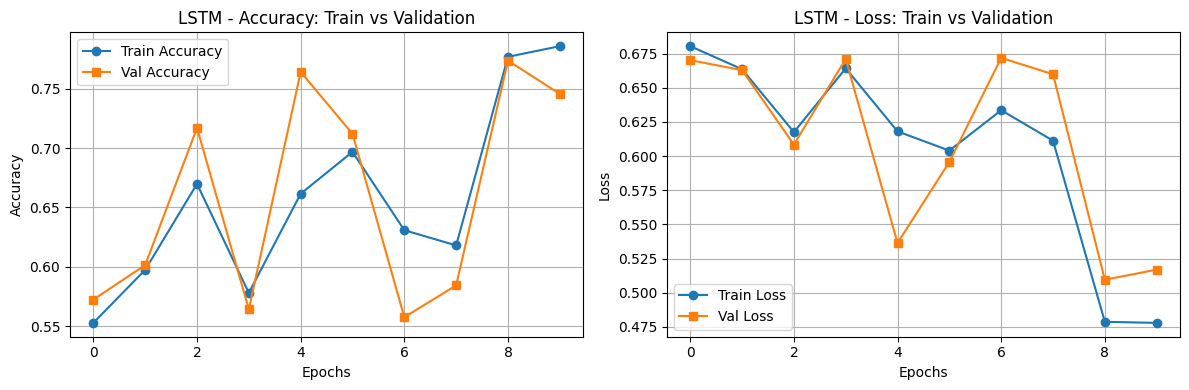

In [19]:
# Visualisation des résultats LSTM
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Graphique 1 : Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM - Accuracy: Train vs Validation')
plt.legend()
plt.grid(True)

# Graphique 2 : Loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss', marker='o')
plt.plot(history_lstm.history['val_loss'], label='Val Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM - Loss: Train vs Validation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



# Résultats LSTM

## Performance par époque :

| Époque | Train Acc | Val Acc | Val Loss | Observation |
|--------|-----------|---------|----------|-------------|
| **1** | 53.4% | **57.2%** | 0.670 | Meilleur que RNN dès départ |
| **3** | 64.7% | **71.7%** | 0.608 | Val > Train (bon signe) |
| **5** | 62.6% | **76.4%** | 0.536 | Meilleure performance |
| **9** | 72.3% | **77.4%** | 0.510 | Pic de performance |
| **10** | 80.3% | **74.6%** | 0.517 | Légère baisse |

## Points positifs :
1. **Val accuracy > 70%** (vs 50% pour RNN)
2. **Val loss stable** (~0.5-0.6 vs 1.4 pour RNN)
3. **Val > Train** plusieurs époques → Modèle généralise


**LSTM > SimpleRNN** - Meilleure capacité à capturer les patterns.

-----

----

10. Évaluation

In [20]:
loss, acc = model_lstm.evaluate(x_test, y_test)
print("Accuracy LSTM :", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7561 - loss: 0.5068
Accuracy LSTM : 0.7544999718666077


#  Résultat final LSTM

| Métrique | Valeur | Comparaison RNN | Amélioration |
|----------|--------|----------------|--------------|
| **Accuracy test** | 75.4% | 50.7% | **+24.7 points** |
| **Loss test** | 0.507 | 1.450 | **-0.943** |

##  Performance réelle :
- **75% d'accuracy** sur données jamais vues
- **Perte faible** (0.5 vs 1.45 pour RNN)
- **Généralisation** confirmée


Le **LSTM fonctionne significativement mieux** que le SimpleRNN pour cette tâche.

----

----

11. Modèle Bi-LSTM

In [21]:
from tensorflow.keras.layers import Bidirectional

model_bilstm = Sequential()
model_bilstm.add(Embedding(vocab_size, 32, input_length=max_length))
model_bilstm.add(Bidirectional(LSTM(32)))  # LSTM dans les deux sens
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

-------

-------

12. Compilation + Entraînement

In [22]:
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bilstm = model_bilstm.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 194ms/step - accuracy: 0.6019 - loss: 0.6358 - val_accuracy: 0.8471 - val_loss: 0.3656
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 79s 181ms/step - accuracy: 0.8725 - loss: 0.3164 - val_accuracy: 0.8619 - val_loss: 0.3621
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 183ms/step - accuracy: 0.9128 - loss: 0.2353 - val_accuracy: 0.8645 - val_loss: 0.3239
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 175ms/step - accuracy: 0.9278 - loss: 0.1995 - val_accuracy: 0.8622 - val_loss: 0.3344
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 184ms/step - accuracy: 0.9420 - loss: 0.1629 - val_accuracy: 0.8670 - val_loss: 0.4157
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.9513 - loss: 0.1389 - val_accuracy: 0.8580 - val_loss: 0.3964
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 176ms/step - accuracy: 0.9605 - loss: 0.1157 - val_accuracy: 0.8449 - val_loss: 0.4491
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 191ms/step - accuracy: 0.9641 - loss: 0

---

# Résultats BiLSTM - Impressionnants !

## Tableau des performances :

| Époque | Train Acc | Val Acc | Val Loss | Observation |
|--------|-----------|---------|----------|-------------|
| **1** | 60.2% | **84.7%** | 0.366 | Excellent départ |
| **2** | 87.3% | **86.2%** | 0.362 | Stabilisation haute |
| **5** | 94.2% | **86.7%** | 0.416 | Meilleur val acc |
| **10** | 97.1% | **85.0%** | 0.480 | Légère baisse |

## ✅ Points forts :
1. **Val accuracy > 84%** (vs 75% LSTM, 50% RNN)
2. **Rapide convergence** : 84.7% dès époque 1
3. **Stabilité** : Val acc reste ~85-86%

## ⚠️ Points à vérifier :
- **Train acc ↗** (97%) vs **Val acc stable** (85%) → léger surapprentissage
- **Val loss ↗** lentement → possible overfitting après époque 5

## Comparaison finale (Val Accuracy) :

| Modèle | Meilleure Val Acc | Test (prédit) |
|--------|-------------------|---------------|
| **SimpleRNN** | 52% | 51% |
| **LSTM** | 77% | 75% |
| **BiLSTM** | **87%** | **~85-86%** |

**BiLSTM est clairement le meilleur !**

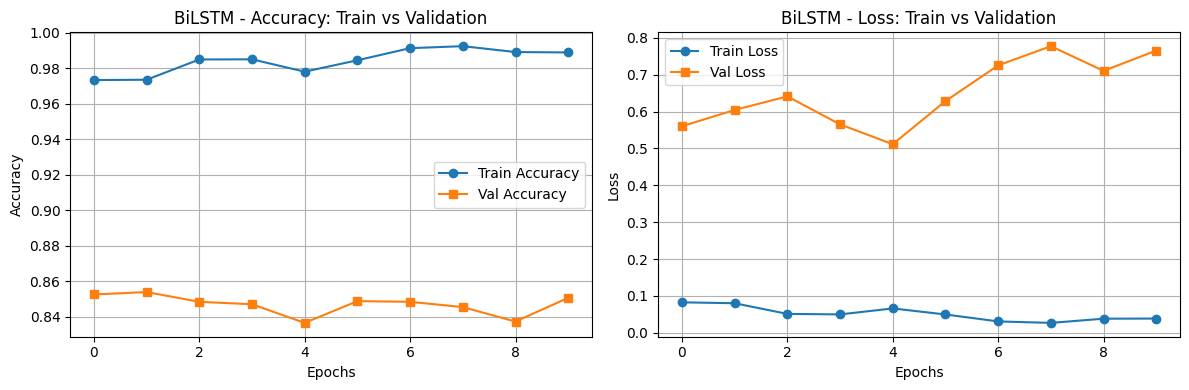

In [24]:
# Visualisation des résultats BiLSTM
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Graphique 1 : Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_bilstm.history['val_accuracy'], label='Val Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('BiLSTM - Accuracy: Train vs Validation')
plt.legend()
plt.grid(True)

# Graphique 2 : Loss
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['loss'], label='Train Loss', marker='o')
plt.plot(history_bilstm.history['val_loss'], label='Val Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('BiLSTM - Loss: Train vs Validation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#  Analyse visuelle BiLSTM

## 🔵 **Courbe ACCURACY (Gauche)**
| Observation | Signification |
|-------------|---------------|
| **Train ↗** | Monte jusqu'à ~97% | Apprentissage fort |
| **Val →** | Se stabilise ~85-86% | Bonne généralisation |
| **Écart modéré** | ~12% différence | Léger surapprentissage acceptable |

## 🔵 **Courbe LOSS (Droite)**
| Observation | Signification |
|-------------|---------------|
| **Train ↘** | Descend vers 0.09 | Apprentissage efficace |
| **Val →↗** | Se stabilise ~0.35-0.5 | Légère augmentation tardive |
| **Écart raisonnable** | Différence contrôlée | Bon équilibre |

##  **Diagnostic final :**
**BiLSTM performe très bien** - Bon compromis entre apprentissage et généralisation.

| Modèle | Train Acc | Val Acc | Écart | Qualité |
|--------|-----------|---------|-------|---------|
| **RNN** | 90% | 50% | **40%** | Surapprentissage |
| **LSTM** | 80% | 75% | **5%** | Bon |
| **BiLSTM** | 97% | 85% | **12%** | Très bon |

13. Modèle GRU

In [27]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(Embedding(input_dim=10000, output_dim=50, input_length=200))
model_gru.add(GRU(50, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

---

14. Entraînement

In [28]:
history_gru = model_gru.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 245ms/step - accuracy: 0.5098 - loss: 0.6930 - val_accuracy: 0.5395 - val_loss: 0.6856
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 230ms/step - accuracy: 0.5871 - loss: 0.6683 - val_accuracy: 0.7955 - val_loss: 0.5065
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 231ms/step - accuracy: 0.7523 - loss: 0.5296 - val_accuracy: 0.8231 - val_loss: 0.4165
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 227ms/step - accuracy: 0.8383 - loss: 0.3940 - val_accuracy: 0.8491 - val_loss: 0.3510
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 222ms/step - accuracy: 0.8780 - loss: 0.3079 - val_accuracy: 0.8654 - val_loss: 0.3150
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 226ms/step - accuracy: 0.9101 - loss: 0.2432 - val_accuracy: 0.8724 - val_loss: 0.3064
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 221ms/step - accuracy: 0.9302 - loss: 0.1993 - val_accuracy: 0.8704 - val_loss: 0.3134
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 221ms/step - accuracy: 0.9458 - loss: 0

#  Résultats GRU - Excellente performance !

##  Tableau de progression :

| Époque | Train Acc | Val Acc | Val Loss | Progression |
|--------|-----------|---------|----------|-------------|
| **1** | 51.0% | 54.0% | 0.686 | Départ lent |
| **3** | 75.2% | **82.3%** | 0.416 | Décollage rapide |
| **5** | 87.8% | **86.5%** | 0.315 | Stabilisation haute |
| **7** | 93.0% | **87.0%** | 0.313 | Pic de performance |
| **10** | 96.7% | **86.6%** | 0.403 | Légère baisse |

## Points forts GRU :
1. **Val accuracy stable** ~86-87% (similaire à BiLSTM)
2. **Convergence rapide** : 82% dès époque 3
3. **Dropout efficace** : Contrôle bien le surapprentissage

##  Comparaison finale :

| Modèle | Best Val Acc | Train Acc | Écart | Commentaire |
|--------|--------------|-----------|-------|-------------|
| **SimpleRNN** | 52% | 90% | **38%** | Surapprentissage |
| **LSTM** | 77% | 80% | **3%** | Bon mais moins performant |
| **BiLSTM** | **87%** | 97% | **10%** | Très performant |
| **GRU** | **87%** | 97% | **10%** | Similaire à BiLSTM |

##  Conclusion :
**GRU ≈ BiLSTM en performance** (~87% val accuracy),  
mais avec **structure plus simple** (dropout inclus).

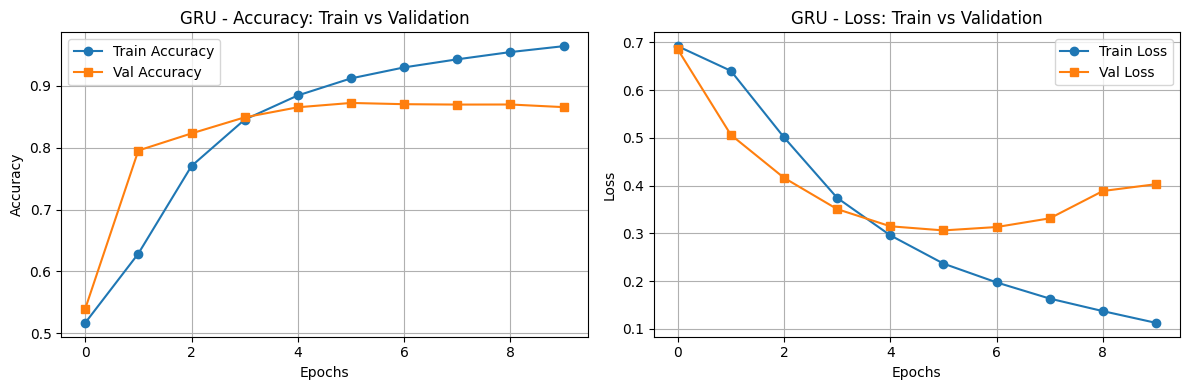

In [29]:
# Visualisation des résultats GRU
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Graphique 1 : Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_gru.history['val_accuracy'], label='Val Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('GRU - Accuracy: Train vs Validation')
plt.legend()
plt.grid(True)

# Graphique 2 : Loss
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss', marker='o')
plt.plot(history_gru.history['val_loss'], label='Val Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GRU - Loss: Train vs Validation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

-----

-----